In [124]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [125]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
age=df['Age'].mean()
df['Age'].fillna(value=age,inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df['Embarked'].ffill(inplace=True)

In [127]:
print(f"shape of data : {df.shape}")
print(f"total null values  :\n{df.isna().sum()}")

shape of data : (891, 11)
total null values  :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [128]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [129]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [130]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
x=df.drop(columns='Survived')
y=df[['Survived']]
print(f"features : {x.shape}")
print(f"Target : {y.shape}")

features : (891, 8)
Target : (891, 1)


In [132]:
x_train,x_,y_train,y_= train_test_split(x,y,test_size=0.3,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)

print(f"size of X_train : {x_train.shape}")
print(f"size of Y_train : {y_train.shape}")

print(f"size of X_cv : {x_cv.shape}")
print(f"size of Y_cv : {y_cv.shape}")

print(f"size of X_test : {x_test.shape}")
print(f"size of Y_test : {y_test.shape}")


size of X_train : (623, 8)
size of Y_train : (623, 1)
size of X_cv : (134, 8)
size of Y_cv : (134, 1)
size of X_test : (134, 8)
size of Y_test : (134, 1)


In [133]:
x_train_scaled=x_train
x_cv_scaled=x_cv
x_test_scaled=x_test

In [134]:
linear_scaler=StandardScaler()
columns_scale=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train_scaled[columns_scale]=linear_scaler.fit_transform(x_train_scaled[columns_scale])
x_cv_scaled[columns_scale]=linear_scaler.transform(x_cv_scaled[columns_scale])
x_test_scaled=linear_scaler.transform(x_test_scaled[columns_scale])

In [135]:
linear_model=LogisticRegression()
linear_model.fit(x_train_scaled,y_train)

prob_train=linear_model.predict(x_train_scaled)
prob_cv=linear_model.predict(x_cv_scaled)

yhat_train=np.where(prob_train >= 0.5,1,0)
yhat_cv=np.where(prob_cv>=0.5,1,0)

print("Length of y_cv:", y_cv.shape)
print("Length of yhat_cv:", yhat_cv.shape)

J_train = np.mean(y_train.squeeze() != yhat_train)
J_cv = np.mean(y_cv.squeeze() != yhat_cv)


print(f"J_train = {J_train}")
print(f"J_cv = {J_cv}")



Length of y_cv: (134, 1)
Length of yhat_cv: (134,)
J_train = 0.18780096308186195
J_cv = 0.2462686567164179


c:\Users\adith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
J_trains=[]
J_cvs=[]

scalers=[]
polys=[]

models=[]

for degree in range(1,12):
    #adding polynomial features
    poly=PolynomialFeatures(degree=degree,include_bias=True)
    x_train_mapped=poly.fit_transform(x_train)
    polys.append(poly)

    #scalling the features
    scaler=StandardScaler()
    x_train_mapped_scaled=scaler.fit_transform(x_train_mapped)
    scalers.append(scaler)

    #model building
    model=LogisticRegression(penalty='l2', C=1)
    model.fit(x_train_mapped_scaled,y_train)
    models.append(model)

    #J_train
    yhat_train_train=model.predict(x_train_mapped_scaled)
    yhat_train=np.where(yhat_train >=0.5,1,0)
    J_train=np.mean(yhat_train != y_train.squeeze())
    J_trains.append(J_train)

    #J_cv
    x_cv_mapped=poly.transform(x_cv)
    x_cv_mapped_scaled=scaler.transform(x_cv_mapped)
    yhat_cv=model.predict(x_cv_mapped_scaled)
    yhat_cv=np.where(yhat_cv >=0.5,1,0)
    J_cv=np.mean(yhat_cv != y_cv.squeeze())
    J_cvs.append(J_cv)


c:\Users\adith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\adith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\adith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\adith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

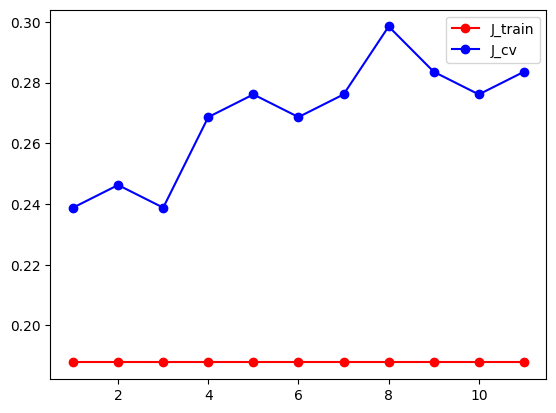

In [197]:
x_axis=np.arange(1,12)

plt.plot(x_axis,J_trains,'-o',c='r',label='J_train')
plt.plot(x_axis,J_cvs,'-o',c='b',label='J_cv')

plt.legend()
plt.show()


In [198]:
J_cvs

[0.23880597014925373,
 0.2462686567164179,
 0.23880597014925373,
 0.26865671641791045,
 0.27611940298507465,
 0.26865671641791045,
 0.27611940298507465,
 0.29850746268656714,
 0.2835820895522388,
 0.27611940298507465,
 0.2835820895522388]

In [207]:
degree=3
print(f"dregree : {degree}")

dregree : 3


In [208]:
#test error
x_test_mapped=polys[degree-1].transform(x_test)
x_test_mapped_scaled=scalers[degree-1].transform(x_test_mapped)

yhat_test=models[degree-1].predict(x_test_mapped_scaled)

yhat_test=np.where(yhat_test>=1,1,0)
J_test=np.mean(yhat_test != y_test.squeeze())


print(f"J_test = {J_test}")

J_test = 0.41044776119402987


In [209]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [210]:
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [211]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].ffill(inplace=True)

In [212]:
test=pd.get_dummies(test,drop_first=True)

In [213]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [218]:
test_mapped=polys[degree-1].transform(test)
test_mapped_scaled=scalers[degree-1].transform(test_mapped)

# Predicting on the test dataset
yhat_test = models[degree-1].predict(test_mapped_scaled)

# Converting probabilities to binary predictions using the threshold of 0.5
yhat_test = np.where(yhat_test >= 0.5, 1, 0)




yhat_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [219]:
test=pd.read_csv('test.csv')

In [220]:

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': yhat_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
